In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [40]:
df = pd.read_csv('/content/train.csv',usecols = ['Age','Fare','Survived'])

In [41]:
df.sample(5)

,Survived,Age,Fare
219,0,30.0,10.500
203,0,45.5,7.225
86,0,16.0,34.375
715,0,19.0,7.650
670,1,40.0,39.000


In [42]:
df.dropna(inplace=True)

In [43]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [44]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
y_test.head()

,Survived
149,0
407,1
53,1
369,1
818,0


In [47]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6293706293706294

# **Cross Validation Check**

In [48]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6317683881064162)

# **Apply Binning**

In [88]:
Kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='Kmeans')
Kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='Kmeans')

In [52]:
trf = ColumnTransformer([
    ('first',Kbin_age,[0]),
    ('second',Kbin_fare,[1])
])

In [53]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [54]:
trf.named_transformers_['first'].n_bins_

array([15])

In [55]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [56]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [57]:
output['Age_labels'] = pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())

In [58]:
output['Fare_labels'] = pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [59]:
output.sample(5)

,age,age_trf,fare,fare_trf,Age_labels,Fare_labels
595,36.0,10.0,24.1500,8.0,"(35.0, 38.0]","(18.75, 26.0]"
567,29.0,7.0,21.0750,8.0,"(28.0, 30.0]","(18.75, 26.0]"
337,41.0,11.0,134.5000,14.0,"(38.0, 42.0]","(108.9, 512.329]"
68,17.0,2.0,7.9250,3.0,"(16.0, 19.0]","(7.896, 8.158]"
318,31.0,8.0,164.8667,14.0,"(30.0, 32.0]","(108.9, 512.329]"


In [60]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)

y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6363636363636364

In [61]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

np.float64(0.6723004694835681)

In [74]:
def discretize(bins,strategy):
  Kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
  kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
  trf = ColumnTransformer(
      [
          ('first',Kbin_age,[0]),
          ('second',kbin_fare,[1])
      ]
  )
  X_trf = trf.fit_transform(X)
  print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring="accuracy")))


In [68]:
  X_trf = trf.fit_transform(X)
  print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring="accuracy")))

0.6331181533646322


<function matplotlib.pyplot.show(close=None, block=None)>

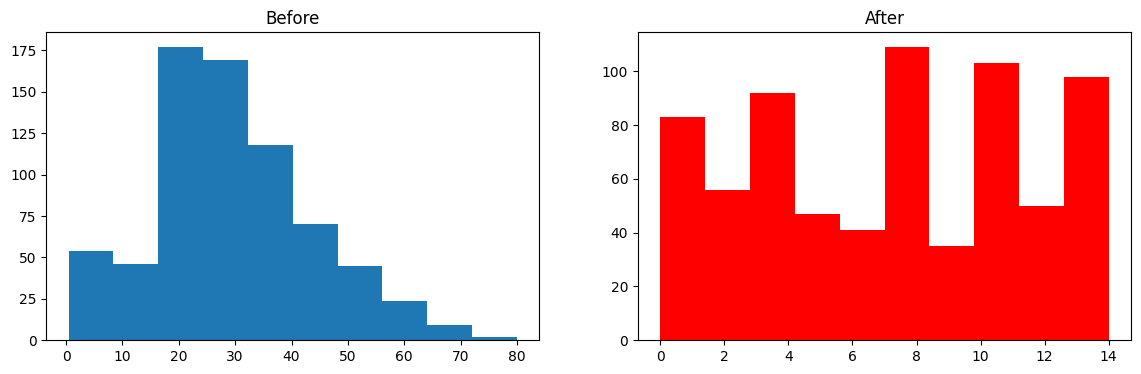

In [70]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(X['Age'])
plt.title("Before")
plt.subplot(122)
plt.hist(X_trf[:,0],color = 'red')
plt.title("After")
plt.show


In [75]:
discretize(5,'quantile')

0.6303208137715179


In [81]:
discretize(15,'quantile')

0.635935054773083


In [85]:
discretize(15,'uniform')

0.6344874804381846
